<a href="https://colab.research.google.com/github/Abhilashkumar041/Web_Scrapping_-_EDA/blob/main/Thread_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [233]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [234]:
! pip install opendatasets

In [235]:
import opendatasets as od

In [236]:
od.download("https://www.kaggle.com/datasets/saloni1712/threads-an-instagram-app-reviews")

Skipping, found downloaded files in "./threads-an-instagram-app-reviews" (use force=True to force download)


In [237]:
df = pd.read_csv("/content/threads-an-instagram-app-reviews/threads_reviews.csv")

In [238]:
df.head()

,source,review_description,rating,review_date
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43


**The Threads, an Instagram App Reviews dataset is a comprehensive collection of user reviews from the Threads mobile app on Google Play Store & App Store, capturing valuable insights and sentiments. The dataset enables the understanding of user satisfaction, evaluation of app performance, and identification of emerging patterns.**

In [239]:
df.shape

(32910, 4)

In [240]:
df.isnull().sum()

source                0
review_description    0
rating                0
review_date           0
dtype: int64

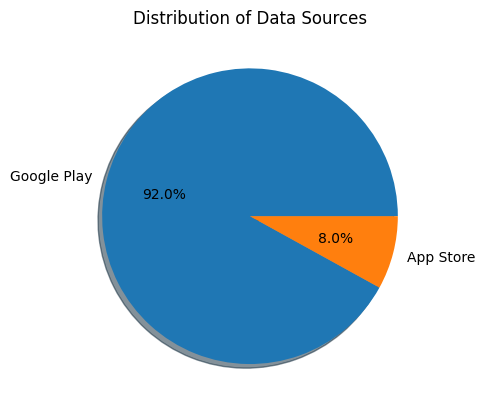

In [241]:
### Checking the source of the Dataset

source_counts = df['source'].value_counts()
plt.pie(source_counts, labels=source_counts.index, autopct='%1.1f%%', shadow=True)
plt.title('Distribution of Data Sources')
plt.show()

**Majority of the rewiew is from Google Play on this dataset**

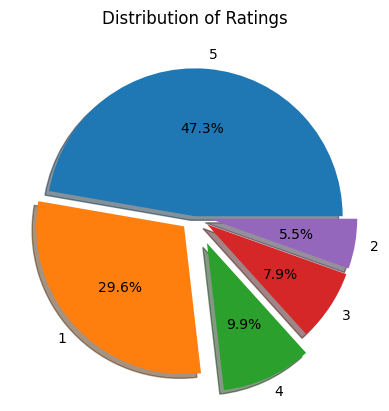

In [242]:
### Checking the rating distribution

rating_counts = df['rating'].value_counts()
explode = (0, 0.1, 0.2, 0.1, 0.1)
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', shadow=True, explode=explode)
plt.title('Distribution of Ratings')
plt.show()

In [243]:
print(rating_counts)

5    15559
1     9726
4     3244
3     2585
2     1796
Name: rating, dtype: int64


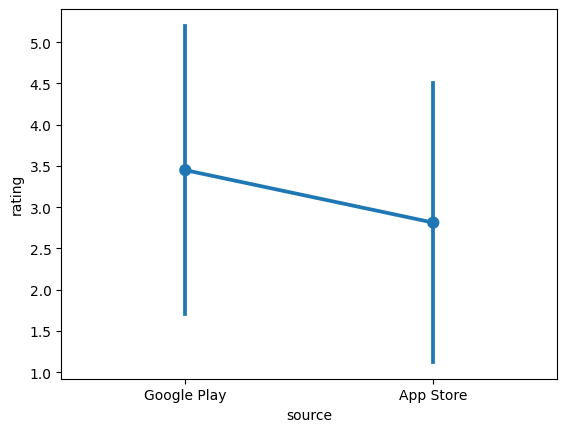

In [244]:
### Checking the impact of rating based on play or app pay

sns.pointplot(x=df['source'], y=df["rating"], ci="sd")
plt.show()

In [245]:
df.head()

,source,review_description,rating,review_date
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43


In [246]:
### Spliting date and time from review data columns

df['review_date'] = pd.to_datetime(df['review_date'])

df['date'] = df['review_date'].dt.date
df['time'] = df['review_date'].dt.time

In [247]:
df.drop("review_date", axis=1, inplace=True)
df.head()

,source,review_description,rating,date,time
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08,14:18:24
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19,20:52:48
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06,23:03:11
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10,00:53:25
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06,16:57:43


In [248]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,32910.0,3.398481,1.75148,1.0,1.0,4.0,5.0,5.0


In [249]:
### Importing required libraries

import nltk

In [250]:
#### Counting number of characters

df["num_char_rewiew"] = df["review_description"].apply(len)

In [251]:
df.head()

,source,review_description,rating,date,time,num_char_rewiew
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08,14:18:24,465
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19,20:52:48,475
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06,23:03:11,497
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10,00:53:25,487
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06,16:57:43,426


In [252]:
rating_lengths = df.groupby("rating")["num_char_rewiew"].mean()
rating_lengths

rating
1     81.071766
2    127.061804
3    118.363250
4     88.709926
5     35.534739
Name: num_char_rewiew, dtype: float64

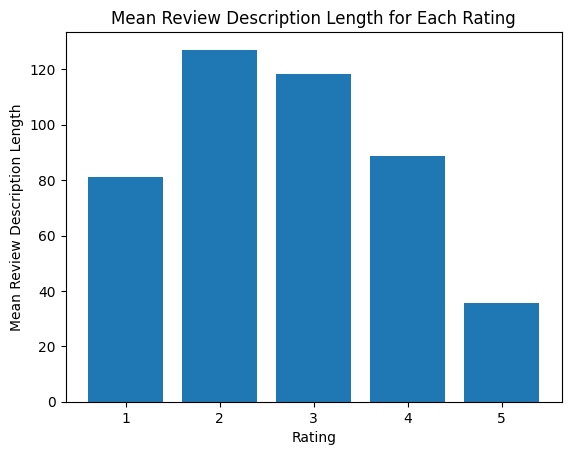

In [253]:
plt.bar(rating_lengths.index, rating_lengths.values)
plt.xlabel("Rating")
plt.ylabel("Mean Review Description Length")
plt.title("Mean Review Description Length for Each Rating")
plt.show()

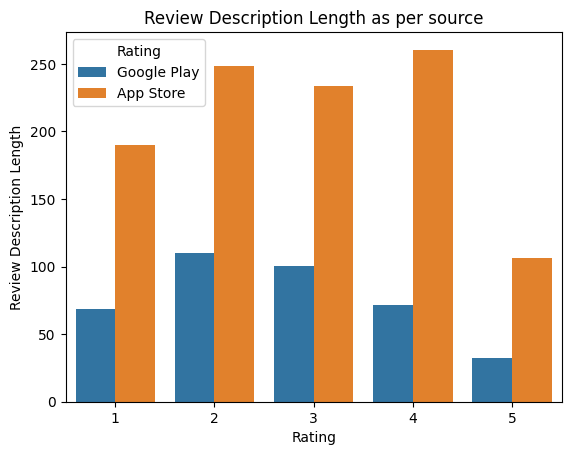

In [254]:
### Checking & Visualizing the rewiew description trend as per sources

sns.barplot(x="rating", y="num_char_rewiew", data=df, ci=None, hue="source")
plt.xlabel("Rating")
plt.ylabel("Review Description Length")
plt.title("Review Description Length as per source")
plt.legend(title="Rating")
plt.show()

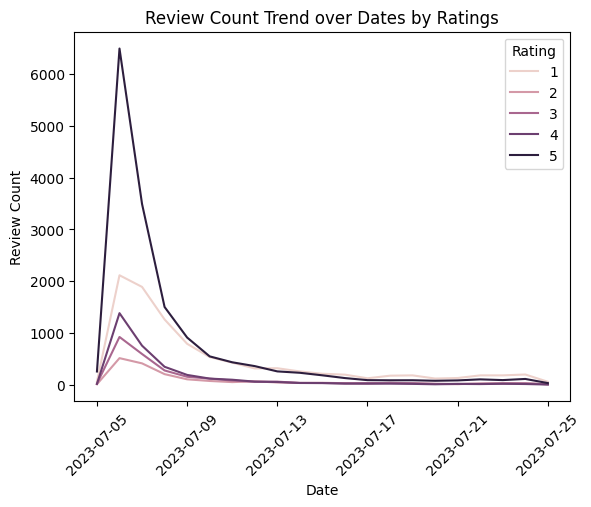

In [255]:
### Checking the impact on rating as per date

review_counts = df.groupby(['date', 'rating']).size().reset_index(name='count')
sns.lineplot(x='date', y='count', hue='rating', data=review_counts)
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Review Count")
plt.title("Review Count Trend over Dates by Ratings")
plt.legend(title="Rating")
plt.show()

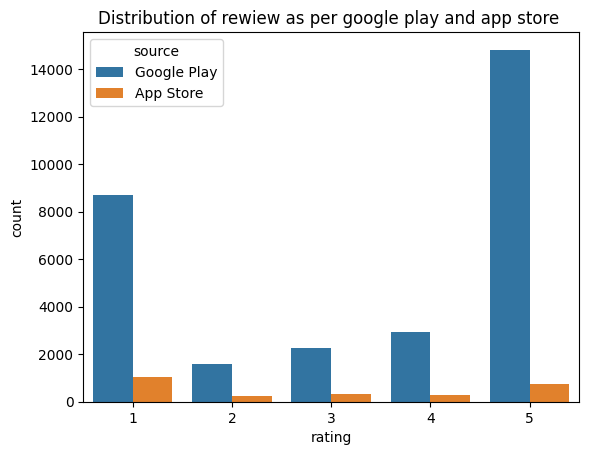

In [256]:
### Checking the rating as per sources

sns.countplot(x = df["rating"], hue = df["source"])
plt.title("Distribution of rewiew as per google play and app store ")
plt.show()

In [257]:
### Importing required libraries

from wordcloud import WordCloud
wc = WordCloud()

In [258]:
df.head()

,source,review_description,rating,date,time,num_char_rewiew
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08,14:18:24,465
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19,20:52:48,475
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06,23:03:11,497
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10,00:53:25,487
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06,16:57:43,426


In [259]:
### Importing required libraries for text pre processing

import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [260]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [261]:
### Text Pre Processing


def text_preprocessing(review_description):
    lemmatizer = WordNetLemmatizer()

    review_description = review_description.lower()
    tokens = word_tokenize(review_description)
    tokens = [token for token in tokens if token.isalnum()]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    clean_text = " ".join(tokens)
    return clean_text

In [262]:
df["clean_text"] = df["review_description"].apply(text_preprocessing)

In [263]:
df.head()

,source,review_description,rating,date,time,num_char_rewiew,clean_text
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08,14:18:24,465,meh not the greatest experience on a chromeboo...
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19,20:52:48,475,pretty good for a first launch it easy to use ...
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06,23:03:11,497,for a brand new app it very well optimized how...
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10,00:53:25,487,great app with a lot of potential however ther...
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06,16:57:43,426,the app is good but it need a lot of functiona...


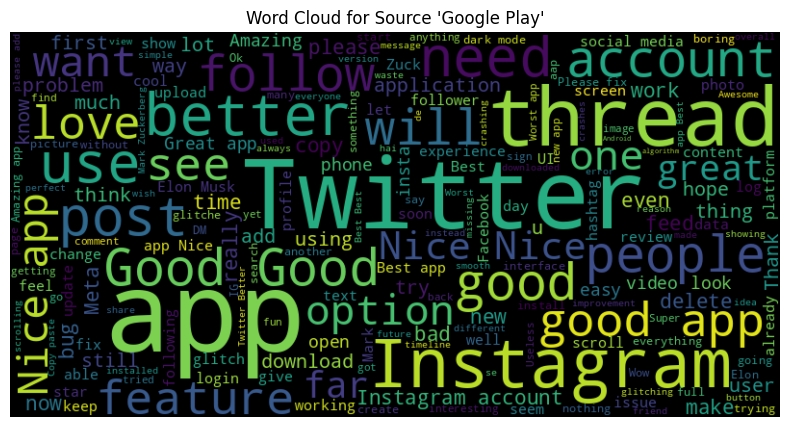

In [264]:
### Checking the most common words are used in google play for rewiews

source_value = "Google Play"
filtered_text = df[df["source"] == source_value]["review_description"].str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(filtered_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f"Word Cloud for Source '{source_value}'")
plt.show()

In [265]:
top_words_google_play = wordcloud.words_
top_10_words_google_play = list(top_words_google_play.keys())[:10]
print("Top 10 common words used for google play rewiews:", top_10_words_google_play)

Top 10 common words used for google play rewiews: ['app', 'Twitter', 'thread', 'Instagram', 'better', 'use', 'need', 'post', 'good', 'Good Good']


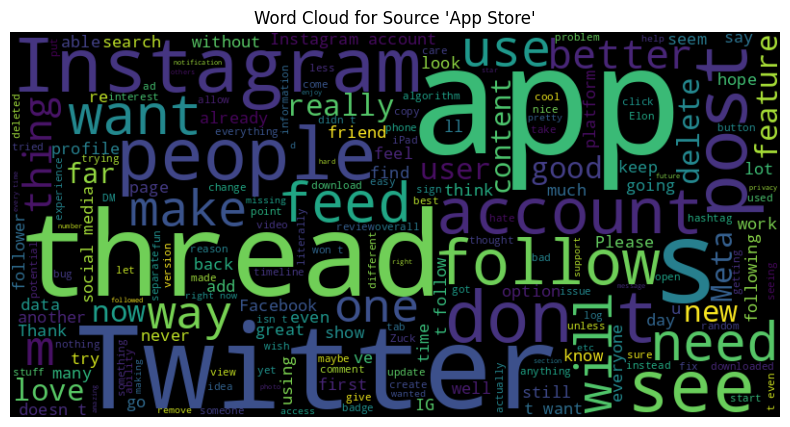

In [266]:
### Checking the most common word used in app store for rewiews

source_value_2 = "App Store"
filtered_text = df[df["source"] == source_value_2]["review_description"].str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(filtered_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f"Word Cloud for Source '{source_value_2}'")
plt.show()

In [267]:
top_words_app_store = wordcloud.words_
top_10_words_app_store = list(top_words_app_store.keys())[:10]
print("Top 10 common words used for app store rewiews:", top_10_words_app_store)

Top 10 common words used for app store rewiews: ['app', 'thread', 's', 'Twitter', 'Instagram', 'post', 'people', 'see', 'don t', 'account']


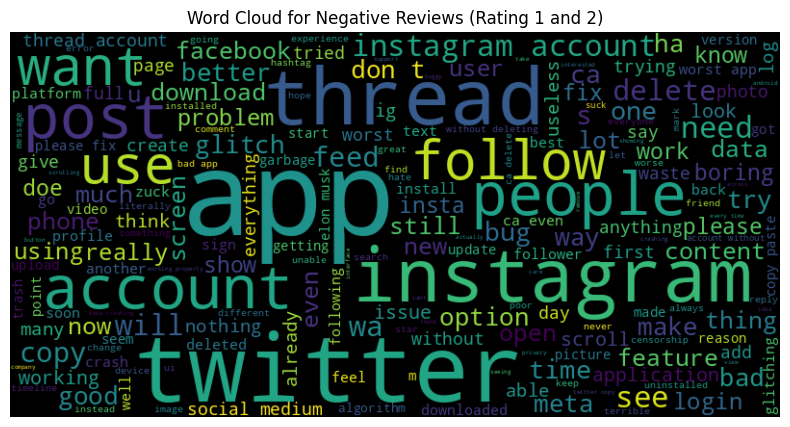

In [268]:
### Checking the negative rewiew and taking all the rating less than 3 are as negative rewiews

negative_text = df[(df["rating"] == 1) | (df["rating"] == 2)]["clean_text"].str.cat(sep=" ")
wordcloud_negative = WordCloud(width=800, height=400).generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Negative Reviews (Rating 1 and 2)")
plt.show()

In [269]:
top_words_negative = wordcloud_negative.words_
top_10_words_negative = list(top_words_negative.keys())[:10]
print("Top 10 common words used for negative rewiews:", top_10_words_negative)

Top 10 common words used for negative rewiews: ['app', 'twitter', 'thread', 'instagram', 'post', 'people', 'account', 'follow', 'want', 'use']


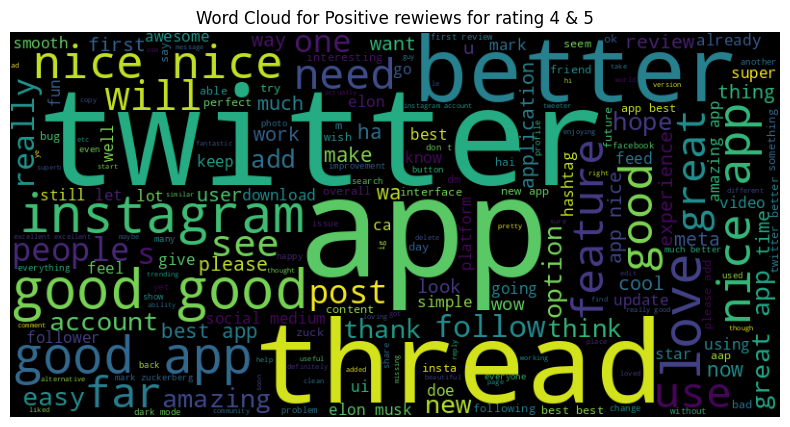

In [270]:
### Checking the positive rewiew and taking all the rating more than 3 are as negative rewiews

positive_text = df[(df["rating"] == 4) | (df["rating"] == 5)]["clean_text"].str.cat(sep=" ")
wordcloud_positive = WordCloud(width=800, height=400).generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive)
plt.axis('off')
plt.title("Word Cloud for Positive rewiews for rating 4 & 5")
plt.show()

In [271]:
top_words_positive = wordcloud_positive.words_
top_10_words_positive = list(top_words_positive.keys())[:10]
print("Top 10 common words used for negative rewiews:", top_10_words_positive)

Top 10 common words used for negative rewiews: ['app', 'twitter', 'thread', 'better', 'good good', 'love', 'instagram', 'good app', 'nice app', 'nice nice']


In [272]:
### Preprocessing time for further analysis

def preprocess_time(time_category):
    time_str = str(time_category)
    if time_str in ["00:00:00", "01:00:00", "02:00:00", "03:00:00", "04:00:00", "05:00:00"]:
        return "Night"
    elif time_str >= "21:00:00" or time_str < "00:00:00":
        return "Night"
    elif time_str >= "05:00:00" and time_str < "12:00:00":
        return "Morning"
    elif time_str >= "12:00:00" and time_str < "17:00:00":
        return "Afternoon"
    elif time_str >= "17:00:00" and time_str < "21:00:00":
        return "Evening"

In [273]:
df["time"] = df["time"].astype("category")

In [274]:
df.dtypes

source                  object
review_description      object
rating                   int64
date                    object
time                  category
num_char_rewiew          int64
clean_text              object
dtype: object

In [275]:
df["time_category_preprocessed"] = df["time"].apply(preprocess_time)

In [276]:
df.head()

,source,review_description,rating,date,time,num_char_rewiew,clean_text,time_category_preprocessed
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08,14:18:24,465,meh not the greatest experience on a chromeboo...,Afternoon
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19,20:52:48,475,pretty good for a first launch it easy to use ...,Evening
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06,23:03:11,497,for a brand new app it very well optimized how...,Night
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10,00:53:25,487,great app with a lot of potential however ther...,None
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06,16:57:43,426,the app is good but it need a lot of functiona...,Afternoon


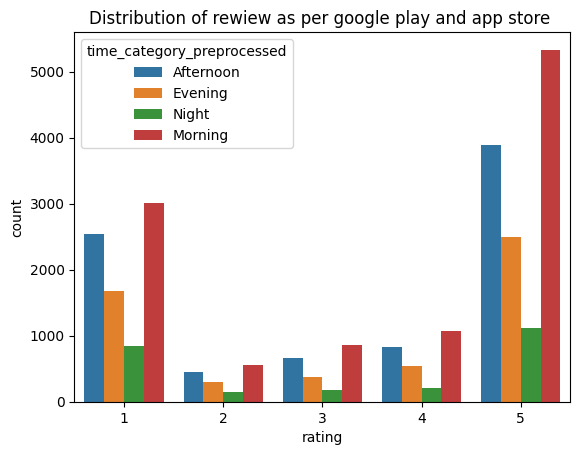

In [277]:
### Checking the rating done by customers based on time stamp

sns.countplot(x = df["rating"], hue = df["time_category_preprocessed"])
plt.title("Distribution of rewiew as per google play and app store ")
plt.show()

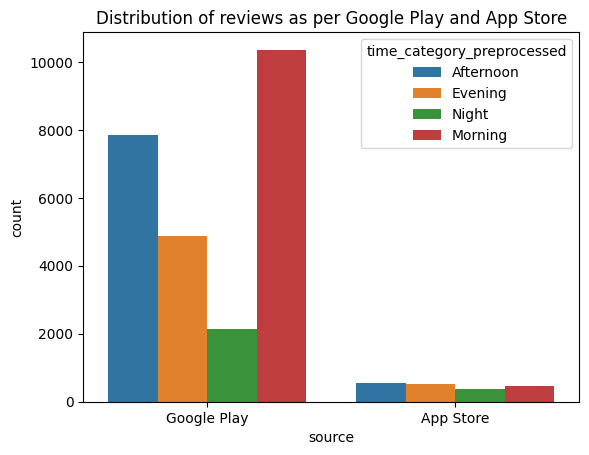

In [278]:
sns.countplot(x="source", hue="time_category_preprocessed", data=df)
plt.title("Distribution of reviews as per Google Play and App Store")
plt.show()

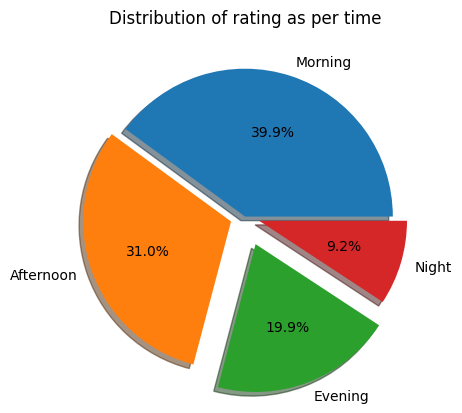

In [279]:
### Checking rewiews done as per the time stamp

time_counts = df['time_category_preprocessed'].value_counts()
explode = (0, 0.1, 0.2, 0.1)
plt.pie(time_counts, labels=time_counts.index, autopct='%1.1f%%', shadow=True, explode=explode)
plt.title('Distribution of rating as per time')
plt.show()

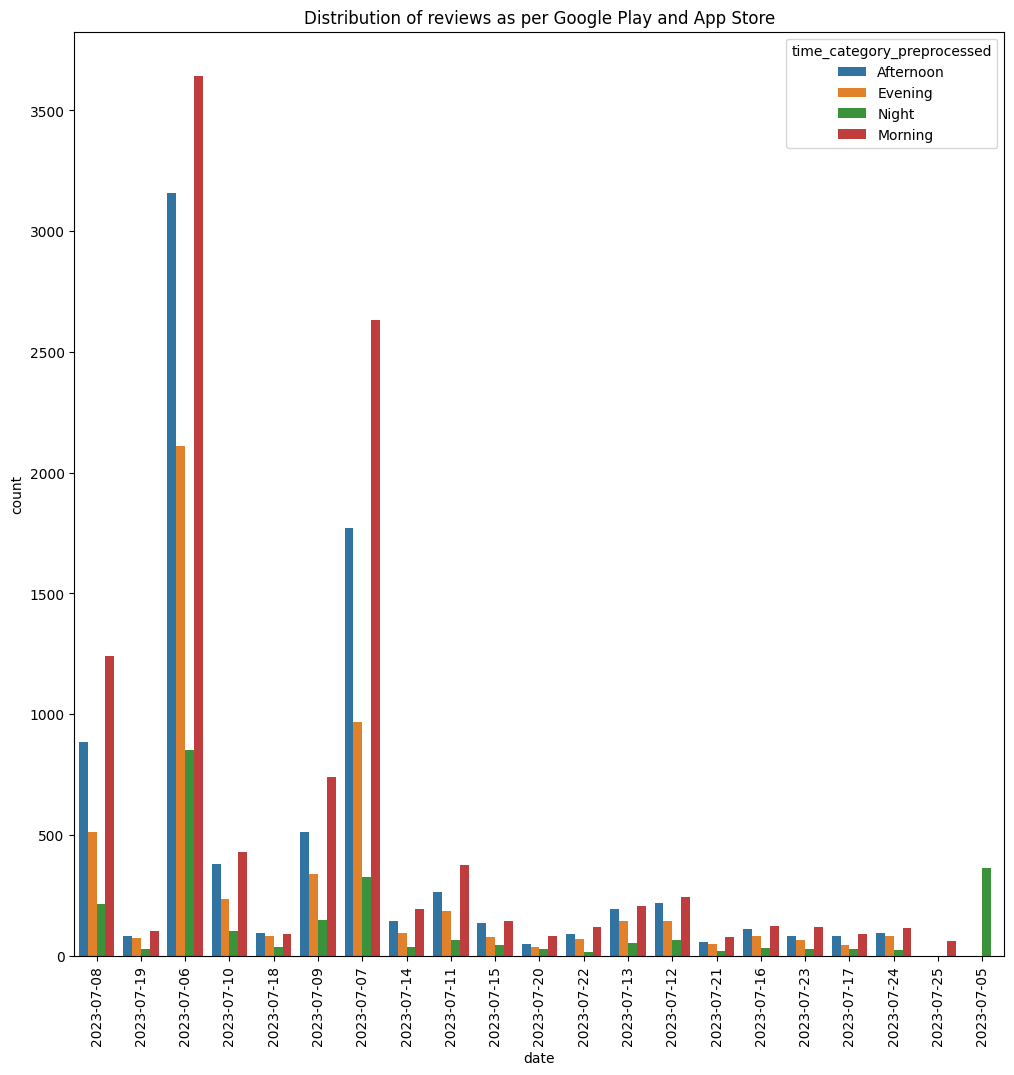

In [280]:
plt.figure(figsize=(12,12))
sns.countplot(x="date", hue="time_category_preprocessed", data=df)
plt.title("Distribution of reviews as per Google Play and App Store")
plt.xticks(rotation = 90)
plt.show()

In [281]:
df.head()

,source,review_description,rating,date,time,num_char_rewiew,clean_text,time_category_preprocessed
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08,14:18:24,465,meh not the greatest experience on a chromeboo...,Afternoon
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19,20:52:48,475,pretty good for a first launch it easy to use ...,Evening
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06,23:03:11,497,for a brand new app it very well optimized how...,Night
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10,00:53:25,487,great app with a lot of potential however ther...,None
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06,16:57:43,426,the app is good but it need a lot of functiona...,Afternoon


**Observations**


*   As per above finding thread got more rewiew from google play than app store
*   However majoprity of the rating are positive which means getting good response of thread as per google play and app store


*   Number of character used for rewiew is higher for below average and poor rewiew. However people using less character if they are gving positive.
*   People using more characters in app stores for rewiew as compare to Google Play




*   Most of the rewiews was done in the inital 7 days of the launch as suggested by data and majority of the rewiews was done
on google play as compare to app store
*   Top 10 most common words used in Google Play Store are  ['app', 'Twitter', 'thread', 'Instagram', 'better', 'use', 'need', 'post', 'good', 'Good Good']


*   Top 10 most common words used in App Store are  ['app', 'thread', 's', 'Twitter', 'Instagram', 'post', 'people', 'see', 'don t', 'account']

*   Top 10 most common negative word used are ['app', 'twitter', 'thread', 'instagram', 'post', 'people', 'account', 'follow', 'want', 'use']


*   Top 10 most common positive word used are ['app', 'twitter', 'thread', 'better', 'good good', 'love', 'instagram', 'good app', 'nice app', 'nice nice']

*  Most of the positive rewiews was done at Morning time while negative was at evening time


*   Google Play Store got most of the positive rewiews in morning time as compare to App Store which got significane
moderate rewiews through out all time stamp including morning, afternon, evening & night

*  People rewiewed mostly in the morning time in 1st week people mostly rewiewd THREAD












